# MNIST Classifier with Dense Neural network 

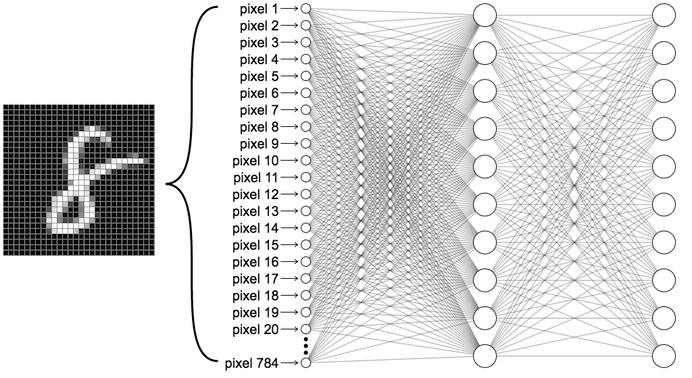

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt

In [4]:
mnist = input_data.read_data_sets("./dataset/mnist/", one_hot=True)

Extracting ./dataset/mnist/train-images-idx3-ubyte.gz
Extracting ./dataset/mnist/train-labels-idx1-ubyte.gz
Extracting ./dataset/mnist/t10k-images-idx3-ubyte.gz
Extracting ./dataset/mnist/t10k-labels-idx1-ubyte.gz


In [5]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

(55000, 784) (55000, 10)
(10000, 784) (10000, 10)


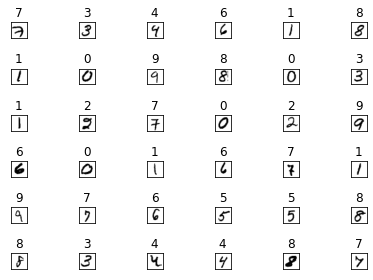

In [6]:
fig = plt.figure()
for i in range(36):
    subplot = fig.add_subplot(6, 6, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title(np.argmax(mnist.train.labels[i]))
    subplot.imshow(mnist.train.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.tight_layout()
plt.show()

# Define

In [7]:
## input place holder

X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])

In [8]:
## model

W1 = tf.Variable(tf.random_normal([784, 10], stddev=0.01), name='W1')
B1 = tf.Variable(tf.random_normal([10]), name='B1')
logits = tf.matmul(X, W1) + B1
# softmax_logits = tf.nn.softmax(logits)

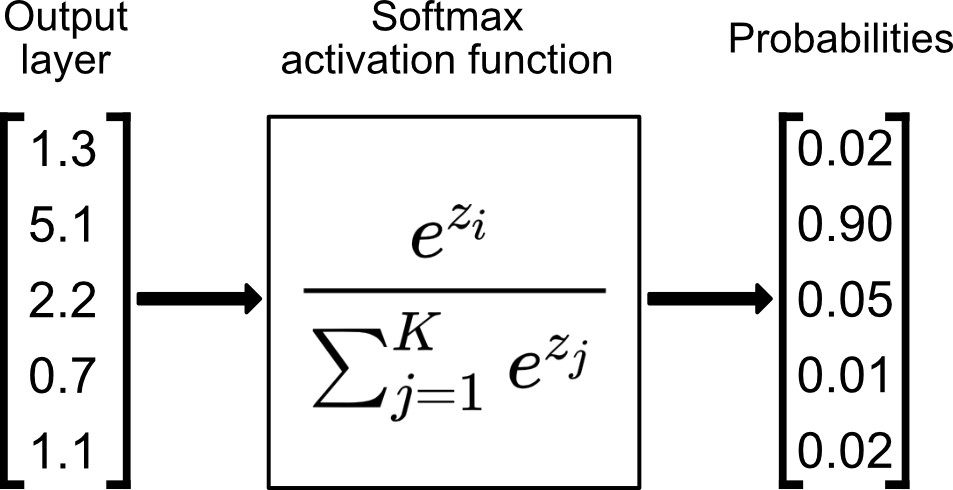

In [9]:
## optimizer
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=Y))
# loss = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(tf.clip_by_value(softmax_logits, 1e-10, 1.0)), [1]))
opt = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
# opt = tf.train.RMSPropOptimizer(0.05).minimize(cost)
# opt = tf.train.AdamOptimizer(0.05).minimize(cost)

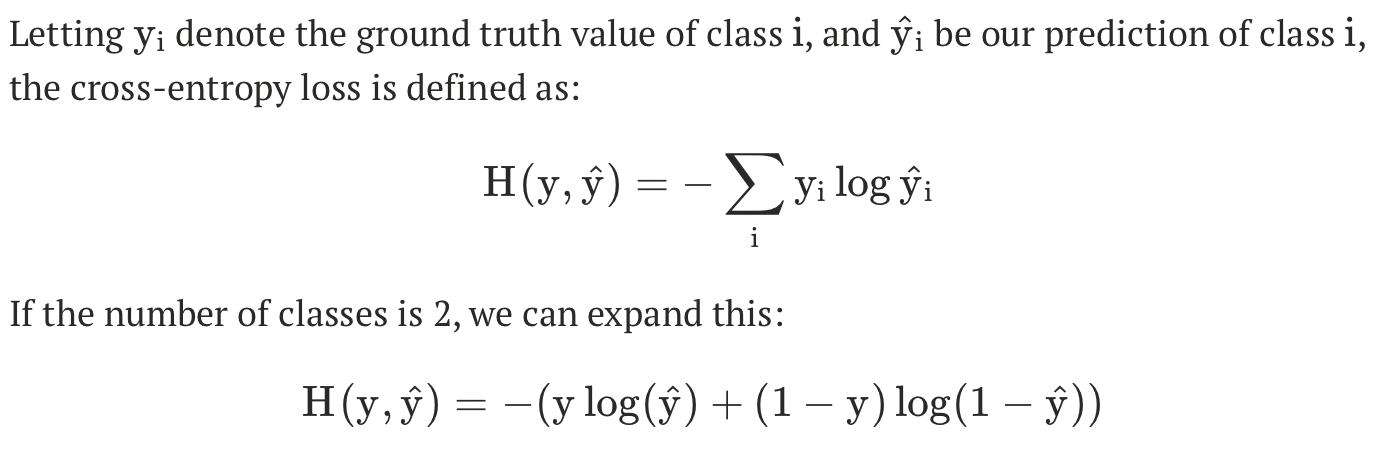

In [10]:
# metrics

is_correct = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# Session run

In [11]:
BATCH_SIZE = 100
EPOCHS = 20
TOTAL_BATCH = int(mnist.train.num_examples / BATCH_SIZE)
MODEL_NAME = 'mnist.dnn'

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
saver = tf.train.Saver()

for epoch in range(EPOCHS):
    total_cost = 0
    for i in range(TOTAL_BATCH):
        batch_xs, batch_ys = mnist.train.next_batch(BATCH_SIZE)
        _, cost_val = sess.run([opt, loss], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val

    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost =', '{:.3f}'.format(total_cost / TOTAL_BATCH), 'Train Acc. =', sess.run(accuracy, feed_dict={X: mnist.train.images, Y: mnist.train.labels}))

print('Training Done!')
print('Test Acc. = ', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
save_path = saver.save(sess, "./model/" + MODEL_NAME)
print(f'saved path : {save_path}')
sess.close()

Epoch: 0001 Avg. cost = 0.688 Train Acc. = 0.8779455
Epoch: 0002 Avg. cost = 0.422 Train Acc. = 0.89247274
Epoch: 0003 Avg. cost = 0.379 Train Acc. = 0.8985636
Epoch: 0004 Avg. cost = 0.357 Train Acc. = 0.9032
Epoch: 0005 Avg. cost = 0.343 Train Acc. = 0.90541816
Epoch: 0006 Avg. cost = 0.333 Train Acc. = 0.9090545
Epoch: 0007 Avg. cost = 0.325 Train Acc. = 0.91083634
Epoch: 0008 Avg. cost = 0.319 Train Acc. = 0.9123818
Epoch: 0009 Avg. cost = 0.314 Train Acc. = 0.91409093
Epoch: 0010 Avg. cost = 0.309 Train Acc. = 0.91474545
Epoch: 0011 Avg. cost = 0.306 Train Acc. = 0.9163091
Epoch: 0012 Avg. cost = 0.302 Train Acc. = 0.91661817
Epoch: 0013 Avg. cost = 0.300 Train Acc. = 0.91776365
Epoch: 0014 Avg. cost = 0.297 Train Acc. = 0.9184
Epoch: 0015 Avg. cost = 0.295 Train Acc. = 0.91874546
Epoch: 0016 Avg. cost = 0.293 Train Acc. = 0.91934544
Epoch: 0017 Avg. cost = 0.291 Train Acc. = 0.92007273
Epoch: 0018 Avg. cost = 0.289 Train Acc. = 0.91925454
Epoch: 0019 Avg. cost = 0.287 Train Acc. 

# Restore model

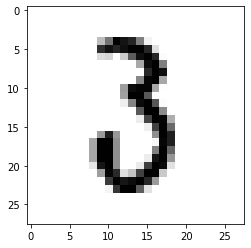

In [21]:
# sample random data
import random
random_idx = random.randint(0, len(mnist.test.images))
sample_image = mnist.test.images[random_idx]

fig = plt.figure
plt.imshow(sample_image.reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [28]:
saver = tf.train.Saver()
MODEL_NAME = 'mnist.dnn'


with tf.Session() as sess:
    saver.restore(sess, "./model/" + MODEL_NAME)
    pred = tf.argmax(logits, axis=1)
    result = sess.run(pred, feed_dict={X:sample_image[None,:]})

print(f'predict : {result}')

INFO:tensorflow:Restoring parameters from ./model/mnist.dnn
predict : [3]
